# Final Project: Multimodal Student Stress Detection System
Students:

## Analysis of Dataset

## 1. Importing Dataset 1

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

In [81]:
df = pd.read_csv('/content/drive/MyDrive/student_lifestyle_dataset.csv')

In [82]:
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (2000, 8)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


In [83]:
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [84]:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
GPA                                 158
Stress_Level                          3
dtype: int64


In [85]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']
Categorical Columns: ['Stress_Level']


In [86]:

for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Stress_Level
Unique Values: ['Moderate' 'Low' 'High']


# 2. Exploratory Data Analysis (EDA)

/tmp/ipython-input-3932774269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


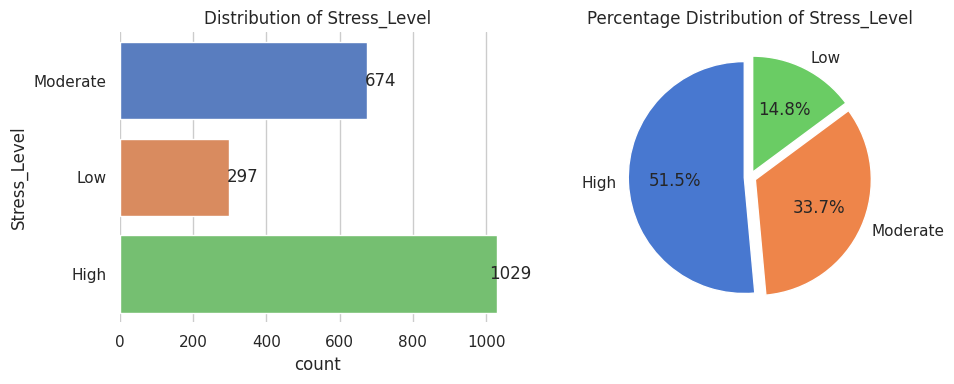

In [87]:
column_name = 'Stress_Level'
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=df, palette='muted')
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)


plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')

plt.tight_layout()
plt.show()

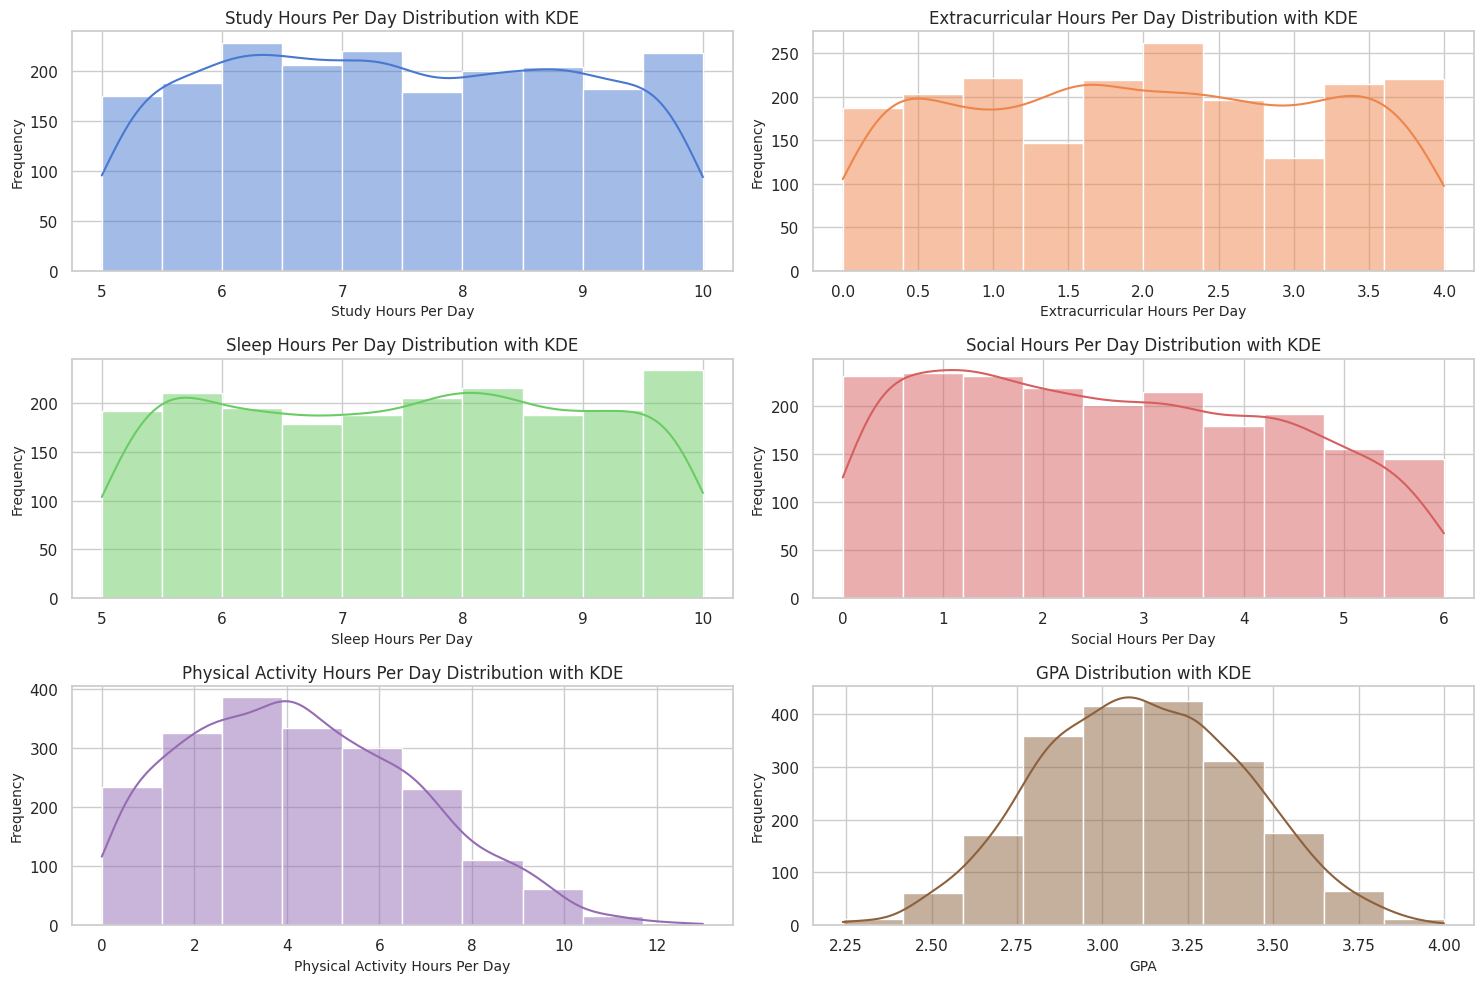

In [88]:

def univariate_analysis_grid(data, columns):
    plt.figure(figsize=(15, 10))
    muted_colors = sns.color_palette("muted", len(columns))

    for i, column in enumerate(columns):
        plt.subplot(3, 2, i + 1)
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE', fontsize=12)
        plt.xlabel(column.replace('_', ' '), fontsize=10)
        plt.ylabel('Frequency', fontsize=10)

    plt.tight_layout()
    plt.show()


columns_to_analyze = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'GPA']


univariate_analysis_grid(df, columns_to_analyze)


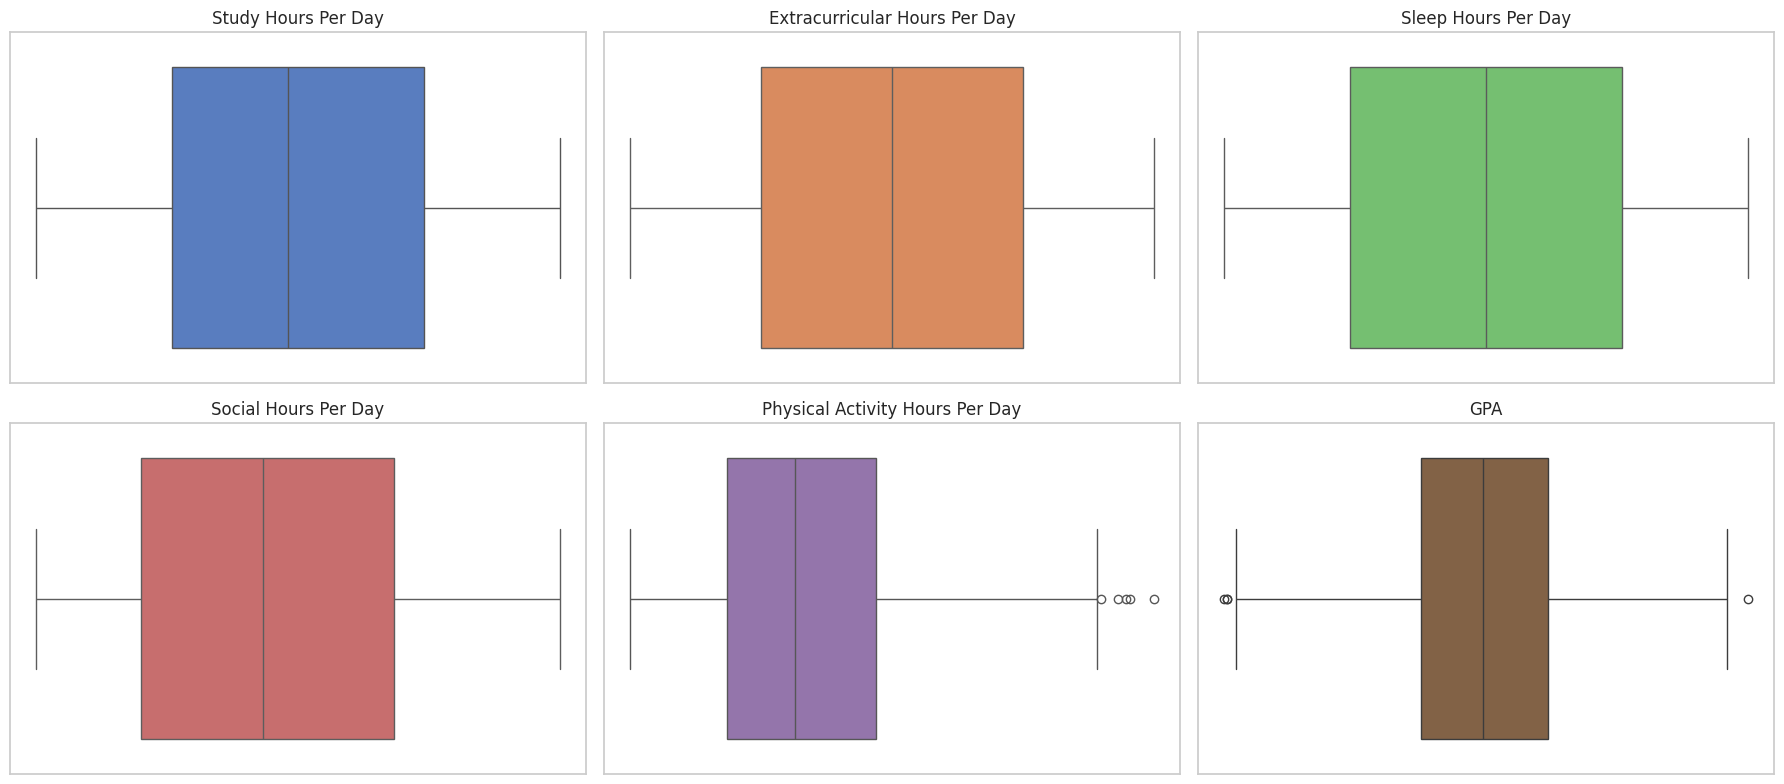

Study Hours Per Day: no outliers

Extracurricular Hours Per Day: no outliers

Sleep Hours Per Day: no outliers

Social Hours Per Day: no outliers

Physical Activity Hours Per Day: outliers detected
  Q1=2.4, Q3=6.1, IQR=3.6999999999999997
  Lower Bound=-3.15, Upper Bound=11.649999999999999
  Outlier values: [13.  12.4 12.1 12.3 11.7]

GPA: outliers detected
  Q1=2.9, Q3=3.33, IQR=0.43000000000000016
  Lower Bound=2.255, Upper Bound=3.9750000000000005
  Outlier values: [4.   2.25 2.24 2.25]



In [89]:
def univariate_boxplots_grid_2x3_clean(data, columns):
    plt.figure(figsize=(18, 8))
    muted_colors = sns.color_palette("muted", len(columns))

    for i, column in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x=data[column], color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")}', fontsize=12)
        plt.xticks([])
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()


    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        if not outliers.empty:
            print(f'{column.replace("_", " ")}: outliers detected\n'
                  f'  Q1={Q1}, Q3={Q3}, IQR={IQR}\n'
                  f'  Lower Bound={lower_bound}, Upper Bound={upper_bound}\n'
                  f'  Outlier values: {outliers[column].values}\n')
        else:
            print(f'{column.replace("_", " ")}: no outliers\n')

columns_to_analyze = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                      'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                      'Physical_Activity_Hours_Per_Day', 'GPA']


univariate_boxplots_grid_2x3_clean(df, columns_to_analyze)


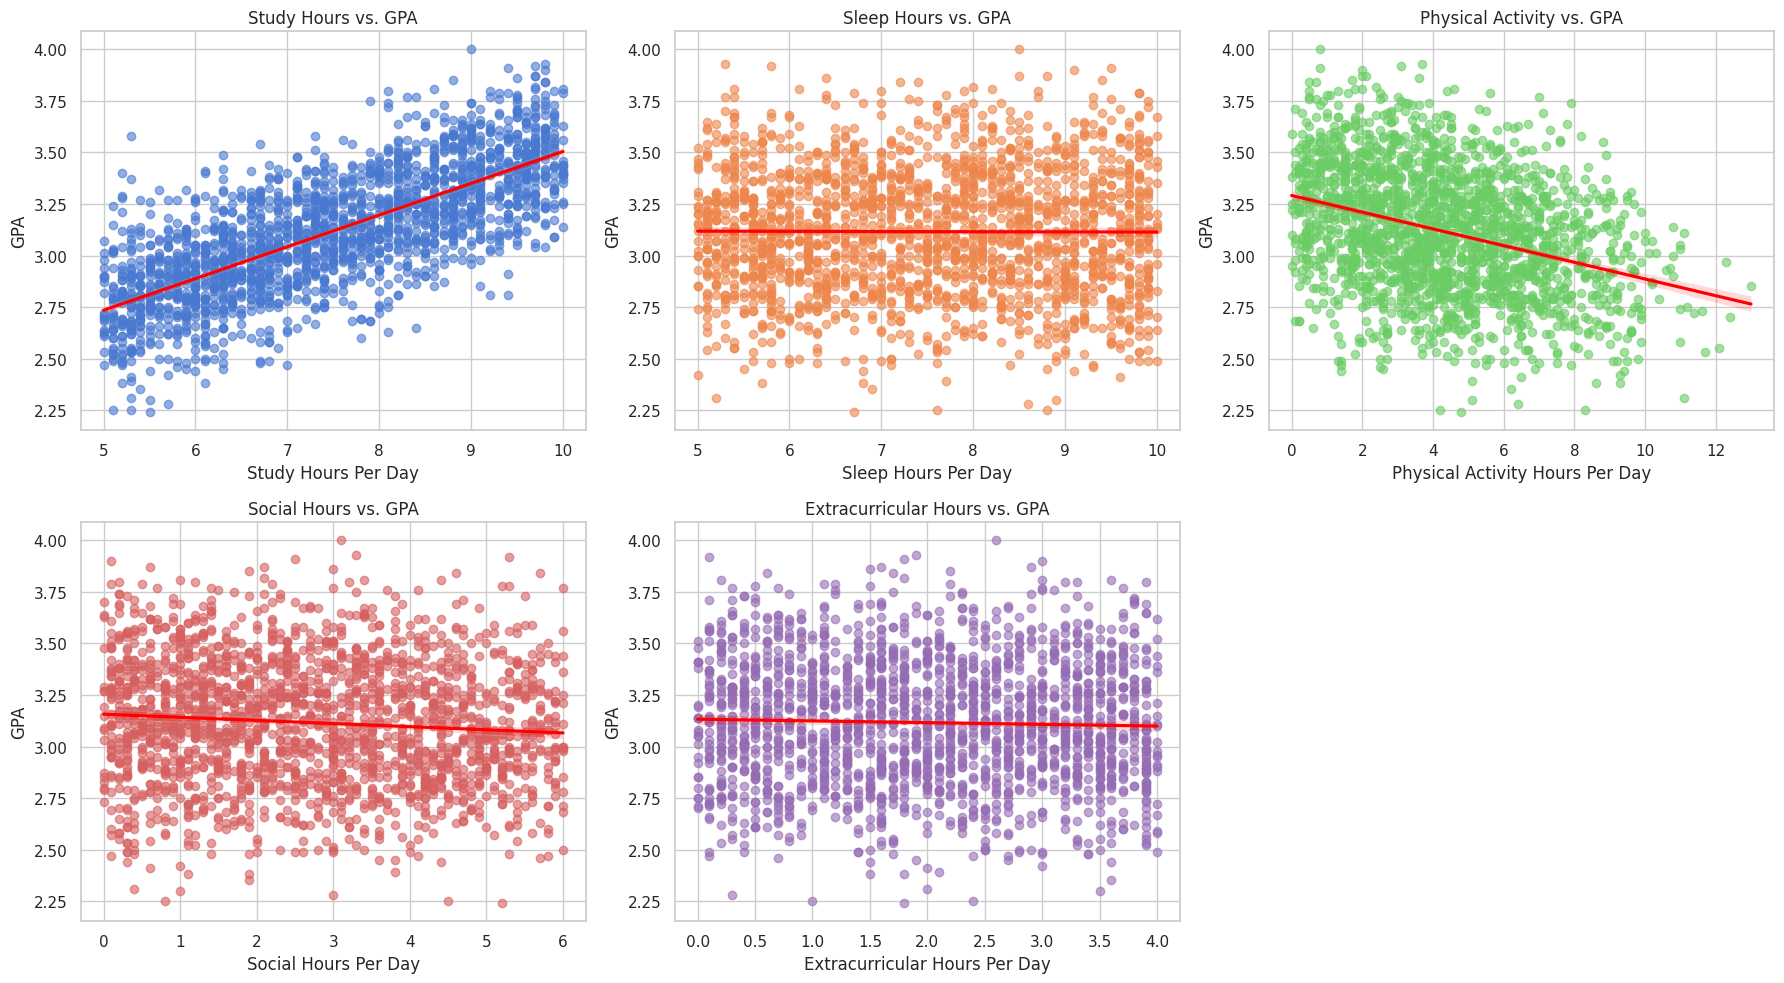

In [90]:
muted_colors = sns.color_palette("muted")
plt.figure(figsize=(18, 10))

# Study Hours vs. GPA
plt.subplot(2, 3, 1)
sns.regplot(x='Study_Hours_Per_Day', y='GPA', data=df,
            color=muted_colors[0], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Study Hours vs. GPA', fontsize=12)
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')

# Sleep Hours vs. GPA
plt.subplot(2, 3, 2)
sns.regplot(x='Sleep_Hours_Per_Day', y='GPA', data=df,
            color=muted_colors[1], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Sleep Hours vs. GPA', fontsize=12)
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('GPA')

# Physical Activity Hours vs. GPA
plt.subplot(2, 3, 3)
sns.regplot(x='Physical_Activity_Hours_Per_Day', y='GPA', data=df,
            color=muted_colors[2], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Physical Activity vs. GPA', fontsize=12)
plt.xlabel('Physical Activity Hours Per Day')
plt.ylabel('GPA')

# Social Hours vs. GPA
plt.subplot(2, 3, 4)
sns.regplot(x='Social_Hours_Per_Day', y='GPA', data=df,
            color=muted_colors[3], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Social Hours vs. GPA', fontsize=12)
plt.xlabel('Social Hours Per Day')
plt.ylabel('GPA')

# Extracurricular Hours vs. GPA
plt.subplot(2, 3, 5)
sns.regplot(x='Extracurricular_Hours_Per_Day', y='GPA', data=df,
            color=muted_colors[4], scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Extracurricular Hours vs. GPA', fontsize=12)
plt.xlabel('Extracurricular Hours Per Day')
plt.ylabel('GPA')

plt.tight_layout()
plt.show()


### Insights from Linear Relationships

**Study Hours vs. GPA:**  
- Strong positive relationship — more study hours → higher GPA.  
- Study time is the most important factor for academic performance.

**Sleep Hours vs. GPA:**  
- No significant correlation — GPA remains stable if sleep is within a normal range.

**Physical Activity vs. GPA:**  
- Slight negative trend — more physical activity slightly lowers GPA.  
- Indicates a minor trade-off between exercise and study time.

**Social Hours vs. GPA:**  
- Weak negative trend — more social hours may slightly reduce GPA.  
- Moderate socializing is fine; excessive time could impact performance.

**Extracurricular Hours vs. GPA:**  
- No noticeable effect — participation in extracurricular activities does not directly affect GPA.

**Overall:**  
- **Study hours matter most.**  
- Physical and social activities have minor negative effects but are important for balance and well-being.  
- Sleep is neutral if students get adequate rest.


### Identifying outliers

/tmp/ipython-input-567899663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y=feature, data=df, palette='muted')
/tmp/ipython-input-567899663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y=feature, data=df, palette='muted')
/tmp/ipython-input-567899663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y=feature, data=df, palette='muted')
/tmp/ipython-input-567899663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

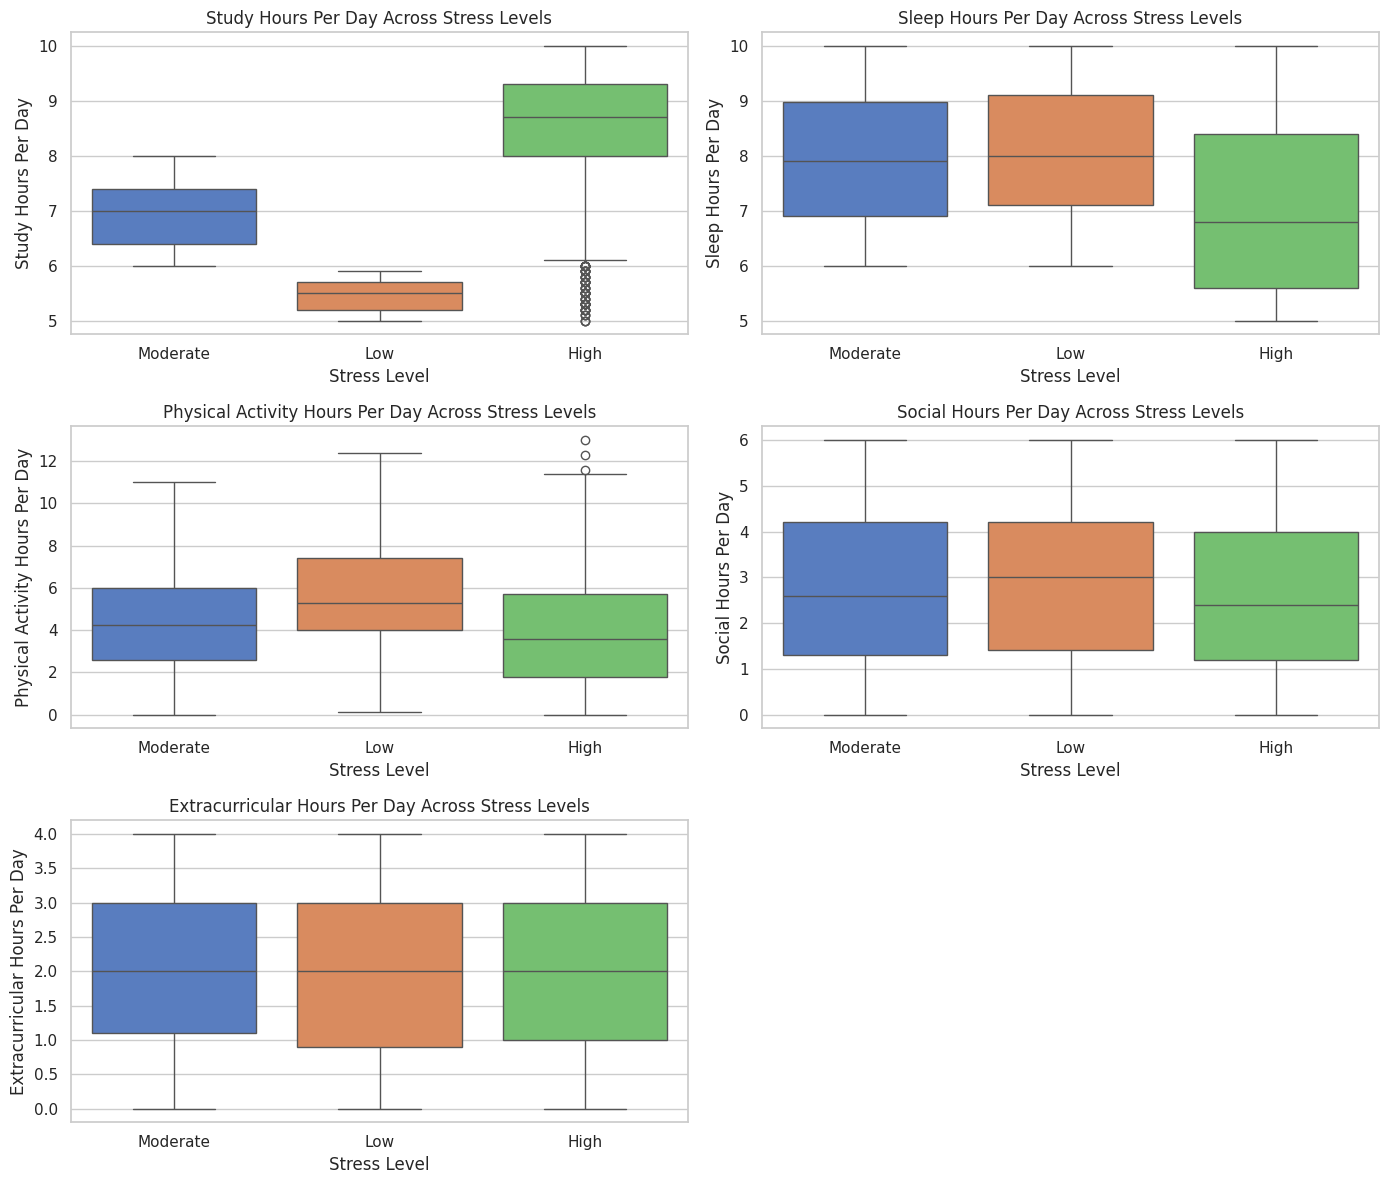

In [91]:
numerical_features = [
    'Study_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day'
]

# Create boxplots for each numerical feature grouped by Stress_Level
plt.figure(figsize=(14, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Stress_Level', y=feature, data=df, palette='muted')
    plt.title(f'{feature.replace("_", " ")} Across Stress Levels')
    plt.xlabel('Stress Level')
    plt.ylabel(feature.replace("_", " "))

plt.tight_layout()
plt.show()


/tmp/ipython-input-2357007283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='muted')


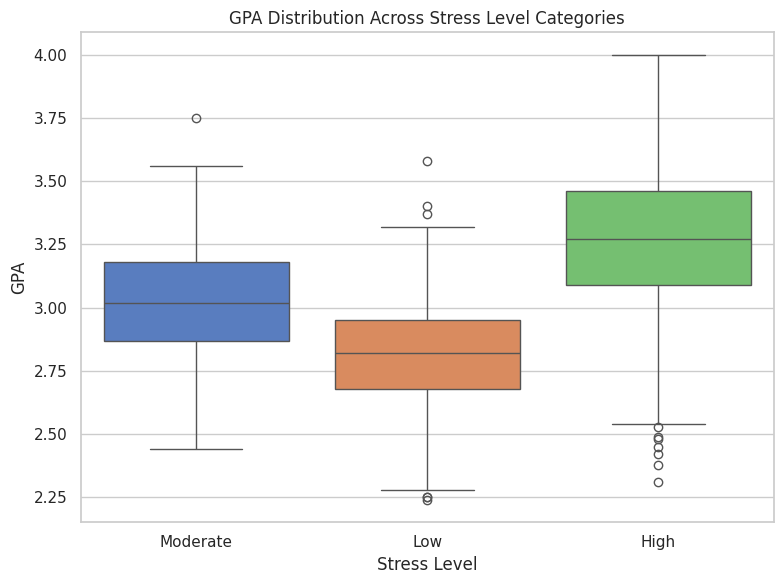

In [92]:
# Boxplot for GPA across different Stress_Level categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='muted')

plt.title('GPA Distribution Across Stress Level Categories')
plt.xlabel('Stress Level')
plt.ylabel('GPA')

# Display the plot
plt.tight_layout()
plt.show()


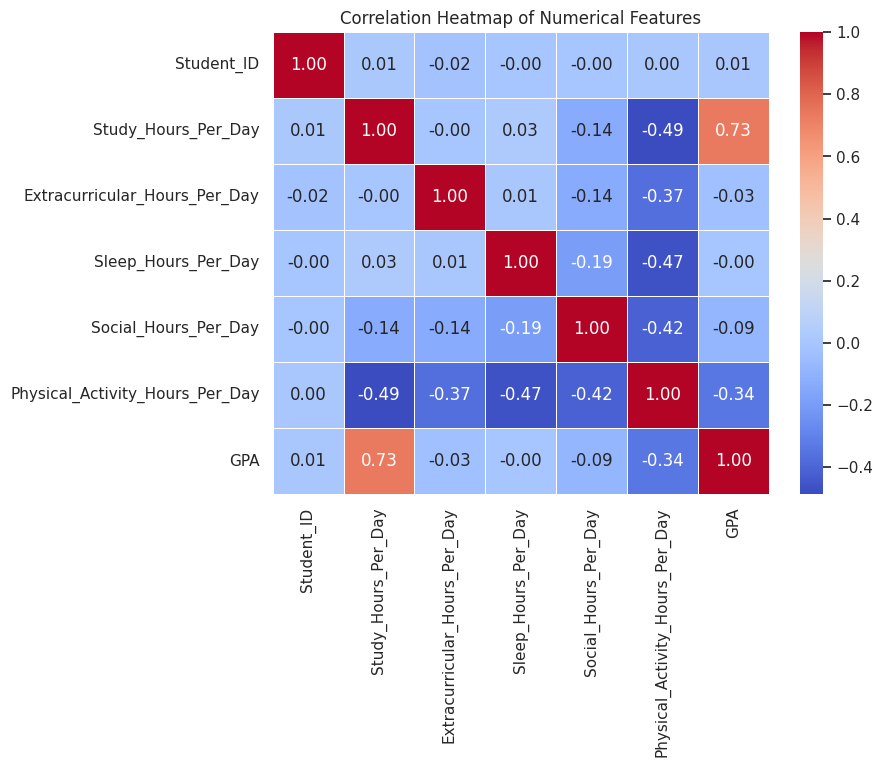

In [93]:
# Plotting a correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Part 1 - Clustering based on Dataset 1**

In [94]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [95]:
sns.set(style="whitegrid")

In [96]:
# PREPROCESSING
features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
              'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day',
              'Extracurricular_Hours_Per_Day', 'GPA']
X_clustering = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

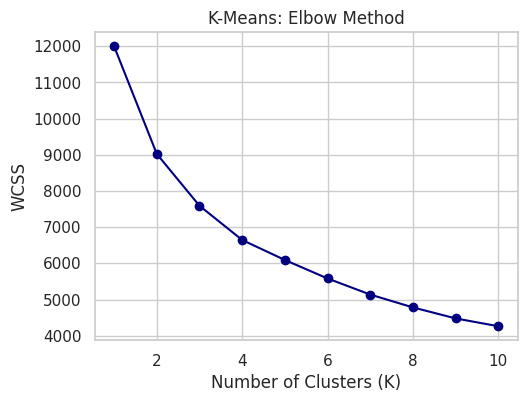

In [97]:
# ==========================================
# METHOD 1: K-MEANS (Centroid-based)
# ==========================================

wcss = []
for i in range(1, 11):
    km_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    km_temp.fit(X_scaled)
    wcss.append(km_temp.inertia_)

# Visualization: Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='navy')
plt.title('K-Means: Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Final Model fitting (K=4)
km_final = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
km_labels = km_final.fit_predict(X_scaled)

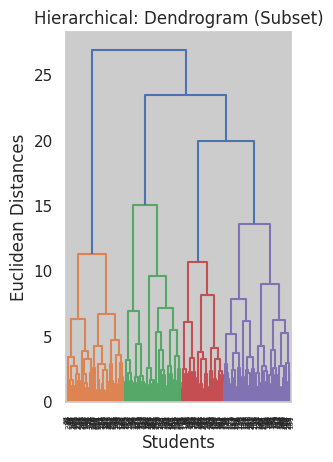

In [98]:
# ==========================================
# METHOD 2: HIERARCHICAL (Connectivity-based)
# ==========================================

# Visualization: Dendrogram
plt.subplot(1, 2, 2)
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:300], method='ward')) # Subset for clarity
plt.title('Hierarchical: Dendrogram (Subset)')
plt.xlabel('Students')
plt.ylabel('Euclidean Distances')
plt.show()

# Final Model fitting (K=4)
hc_final = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc_final.fit_predict(X_scaled)

In [99]:
# ==========================================
# METHOD 3: DBSCAN (Density-based)
# ==========================================

# DBSCAN finds clusters automatically based on density (eps)
db_final = DBSCAN(eps=1.2, min_samples=5)
db_labels = db_final.fit_predict(X_scaled)

In [100]:
# ==========================================
#  FINAL COMPARISON & METRICS
# ==========================================
def calculate_metrics(name, labels, data):
    # Check if more than 1 cluster found (DBSCAN might fail)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return {'Model': name, 'Silhouette': -1, 'Davies-Bouldin': 999, 'Clusters_Found': n_clusters}

    return {
        'Model': name,
        'Silhouette': silhouette_score(data, labels),
        'Davies-Bouldin': davies_bouldin_score(data, labels),
        'Clusters_Found': n_clusters
    }

comparison = [
    calculate_metrics('K-Means', km_labels, X_scaled),
    calculate_metrics('Hierarchical', hc_labels, X_scaled),
    calculate_metrics('DBSCAN', db_labels, X_scaled)
]

comparison_df = pd.DataFrame(comparison)

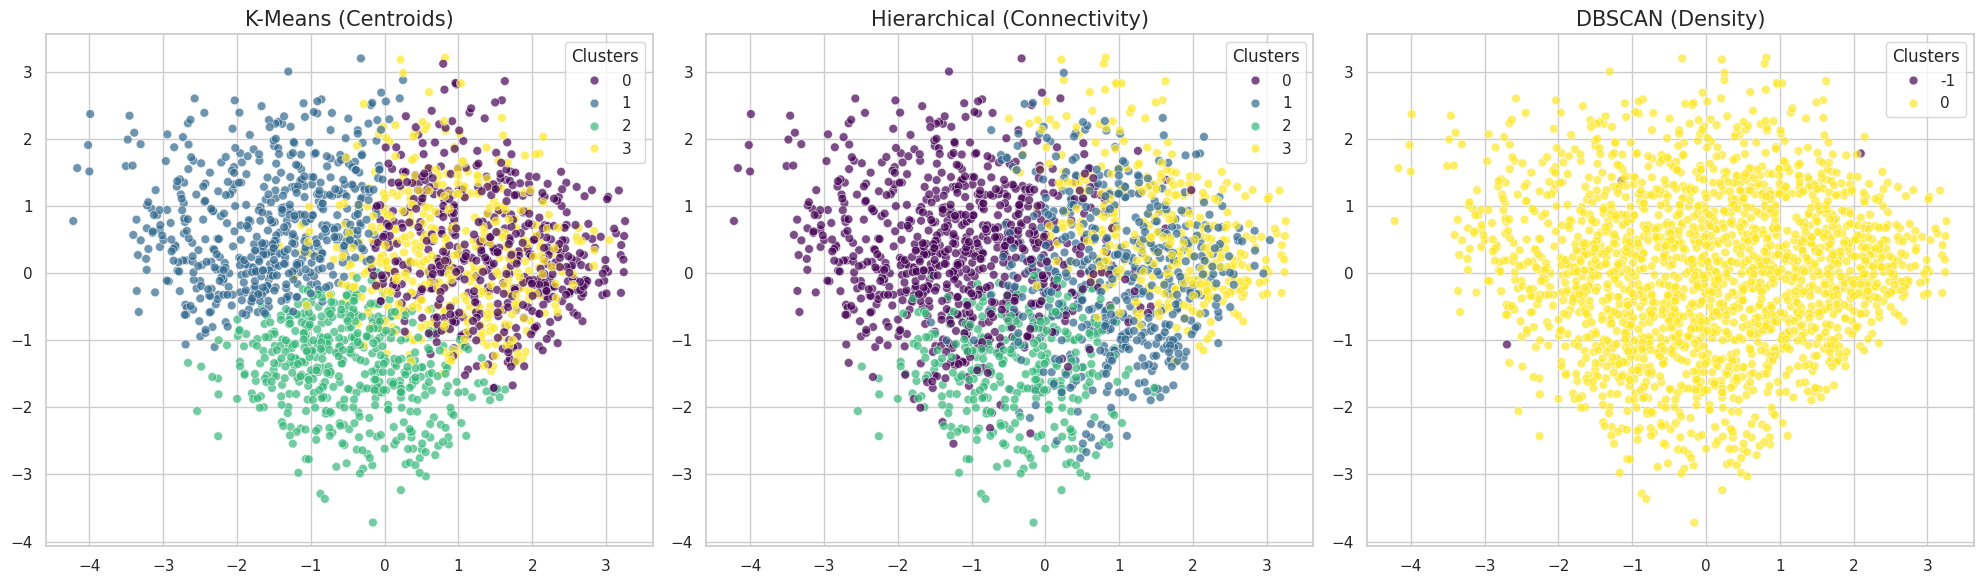

 FINAL CLUSTERING MODEL SELECTION SUMMARY
       Model  Silhouette  Davies-Bouldin  Clusters_Found
     K-Means    0.204091        1.531639               4
Hierarchical    0.145431        1.754794               4
      DBSCAN   -1.000000      999.000000               1


In [101]:
# PCA VISUALIZATION (Comparison)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
labels_to_plot = [km_labels, hc_labels, db_labels]
titles = ['K-Means (Centroids)', 'Hierarchical (Connectivity)', 'DBSCAN (Density)']

for i, ax in enumerate(axes):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_to_plot[i],
                    palette='viridis', ax=ax, s=40, alpha=0.7)
    ax.set_title(titles[i], fontsize=15)
    ax.legend(title='Clusters', loc='upper right')

plt.tight_layout()
plt.show()

print(" FINAL CLUSTERING MODEL SELECTION SUMMARY")
print(comparison_df.to_string(index=False))

# **Part 2 - Classification of stress based on Dataset 1**


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [103]:
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day',
        'Extracurricular_Hours_Per_Day', 'GPA']]
y = df['Stress_Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
#Logistic Regression
log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log))

Logistic Regression
              precision    recall  f1-score   support

        High       0.86      0.88      0.87       206
         Low       0.84      0.92      0.88        59
    Moderate       0.83      0.77      0.80       135

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



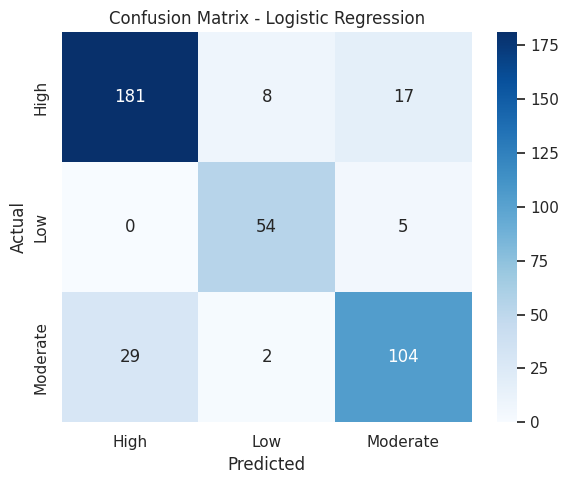

In [106]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_log,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=log_clf.classes_,
    yticklabels=log_clf.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [107]:
#Decision Tree Classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(random_state=42,max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier
              precision    recall  f1-score   support

        High       1.00      0.69      0.82       206
         Low       0.81      1.00      0.89        59
    Moderate       0.73      1.00      0.85       135

    accuracy                           0.84       400
   macro avg       0.85      0.90      0.85       400
weighted avg       0.88      0.84      0.84       400



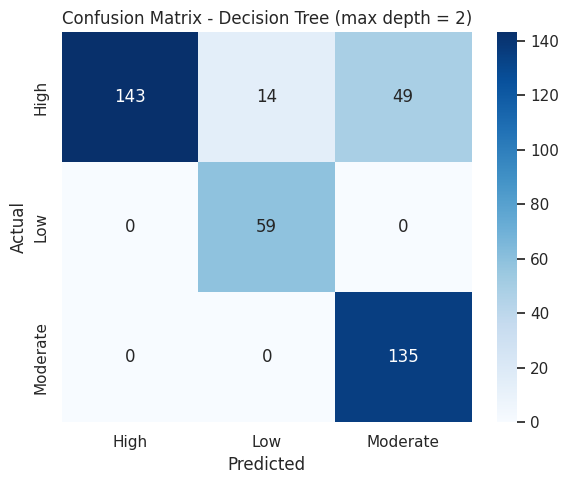

In [108]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=dt_clf.classes_,
    yticklabels=dt_clf.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (max depth = 2)')
plt.tight_layout()
plt.show()

In [109]:
#SVM
svm_clf = SVC(
    kernel='rbf',
    class_weight='balanced',
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM ")
print(classification_report(y_test, y_pred_svm))

SVM 
              precision    recall  f1-score   support

        High       0.98      0.95      0.97       206
         Low       0.78      0.98      0.87        59
    Moderate       0.95      0.90      0.92       135

    accuracy                           0.94       400
   macro avg       0.90      0.94      0.92       400
weighted avg       0.94      0.94      0.94       400



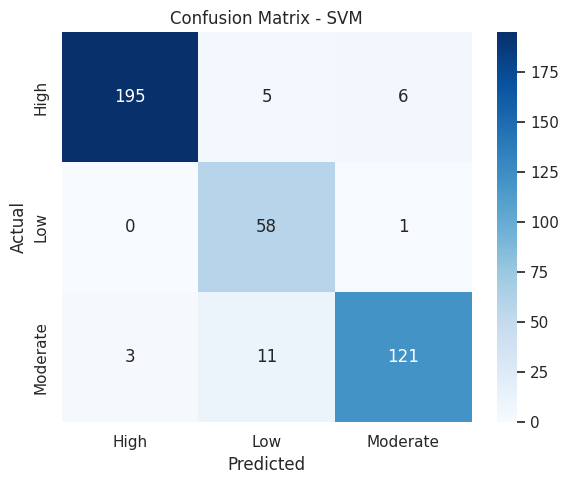

In [110]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=svm_clf.classes_,
    yticklabels=svm_clf.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

### Model Comparison and Justification

Based on the metrics, **Random Forest outperforms Logistic Regression** in predicting student stress levels.  

**Model Metrics:**

**Logistic Regression**  
- Accuracy: 0.84  
- F1-score: High – 0.86, Low – 0.88, Moderate – 0.81  
- Precision and Recall indicate some misclassifications, especially between High and Moderate stress.  

**Random Forest**  
- Accuracy: 1.00  
- F1-score: High – 1.00, Low – 1.00, Moderate – 1.00  
- Precision and Recall show perfect prediction for all classes.  

**Reasons Random Forest is better:**  
- **Higher accuracy and F1-scores** across all classes.  
- **Perfect recognition of minority classes** (Low stress: 59 samples).  
- **Confusion matrix** confirms no misclassifications.  

So,Random Forest is the preferred model for this dataset because it provides complete and accurate predictions for all stress levels.

# **Part 3 - Classification of stress based on Dataset 2 (audio dataset)**

## 1. Loading RAVDESS dataset

In [ ]:
import os
import librosa
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

In [ ]:
DATASET_PATH = "/content/drive/My Drive/ravdess/"

# Hyperparameters
SAMPLE_RATE = 22050
DURATION = 3 # We will cut/pad all audio to 3 seconds
N_MFCC = 60  # Number of features to extract

## 2. Preprocessing

In [ ]:
# FEATURE EXTRACTION LOGIC
def get_stress_label(filename):
    """
    Decodes RAVDESS filename (03-01-06-01-01-01-01.wav).
    3rd number is emotion.
    """
    part = filename.split('-')[2]

    # 01=Neutral, 02=Calm, 03=Happy -> LOW STRESS (Class 0)
    if part in ['01', '02', '03']:
        return 0
    # 04=Sad, 05=Angry, 06=Fearful -> HIGH STRESS (Class 1)
    elif part in ['04', '05', '06']:
        return 1
    # 07=Disgust, 08=Surprised -> SKIP
    else:
        return None

def extract_features(file_path):
    """
    Loads audio, handles duration, extracts MFCCs.
    """
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION, offset=0.5)

        expected_length = SAMPLE_RATE * DURATION
        if len(audio) < expected_length:
            audio = np.pad(audio, (0, expected_length - len(audio)))
        else:
            audio = audio[:expected_length]

        # Extract MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)

        mfccs_scaled = np.mean(mfccs.T, axis=0)

        return mfccs_scaled

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [ ]:
# PROCESS DATASET
X = []
y = []

print("Scanning Google Drive and processing audio...")

files_found = 0
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith('.wav'):
            files_found += 1

            label = get_stress_label(file)

            if label is not None:
                file_path = os.path.join(root, file)

                # Extract Features
                features = extract_features(file_path)

                if features is not None:
                    X.append(features)
                    y.append(label)

print(f"Total files found: {files_found}")
print(f"Total files used (Filtered): {len(X)}")
print(f"Class Distribution: {y.count(0)} Low Stress, {y.count(1)} High Stress")

Scanning Google Drive and processing audio...

Total files found: 1440
Total files used (Filtered): 1056
Class Distribution: 480 Low Stress, 576 High Stress


In [ ]:
# Convert to Numpy Arrays
X = np.array(X)
y = np.array(y)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape for CNN (Samples, Features, 1)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print(f"Training Data Shape: {X_train.shape}")

Training Data Shape: (844, 60, 1)


## 3. CNN classifier

In [ ]:
class AudioStressClassifier:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = self._build_model()
        self.history = None

    def _build_model(self):
        """Builds a 3-Block Deep CNN with Regularization"""
        model = Sequential()

        # Block 1
        model.add(Conv1D(64, kernel_size=5, padding='same', activation='relu', input_shape=self.input_shape))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))

        # Block 2
        model.add(Conv1D(128, kernel_size=5, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.3))

        # Block 3
        model.add(Conv1D(256, kernel_size=3, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.3))

        # Dense Layers
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))

        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))

        # Output (Binary)
        model.add(Dense(1, activation='sigmoid'))

        # Compile
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def train(self, X_train, y_train, X_val, y_val, epochs=60):
        # Callbacks for advanced training
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=32,
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

    def visualize_results(self, X_test, y_test):
        # Plot Training History
        acc = self.history.history['accuracy']
        val_acc = self.history.history['val_accuracy']
        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']

        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(acc, label='Train Acc')
        plt.plot(val_acc, label='Val Acc')
        plt.title('Accuracy Curve')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(loss, label='Train Loss')
        plt.plot(val_loss, label='Val Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()

        # Confusion Matrix
        y_pred = (self.model.predict(X_test) > 0.5).astype(int)

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Low Stress', 'High Stress']))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Low Stress', 'High Stress'],
                    yticklabels=['Low Stress', 'High Stress'])
        plt.title('Confusion Matrix')
        plt.show()

    def save(self, filepath):
        self.model.save(filepath)
        print(f"Model saved to {filepath}")

## 4. Training part

In [ ]:
# Initialize
cnn_input_shape = (X_train.shape[1], 1)
stress_system = AudioStressClassifier(input_shape=cnn_input_shape)

# Train
stress_system.train(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5979 - loss: 0.8315 - val_accuracy: 0.4528 - val_loss: 3.1824 - learning_rate: 0.0010
Epoch 2/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6245 - loss: 0.7145 - val_accuracy: 0.4528 - val_loss: 2.2442 - learning_rate: 0.0010
Epoch 3/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5957 - loss: 0.7036 - val_accuracy: 0.4811 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 4/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6658 - loss: 0.6401 - val_accuracy: 0.5566 - val_loss: 0.8000 - learning_rate: 0.0010
Epoch 5/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6495 - loss: 0.6573 - val_accuracy: 0.5708 - val_loss: 0.7733 - learning_rate: 0.0010
Epoch 6/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6587 - loss: 0.6139 - val_accuracy: 0.5943 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 7/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7091 - loss: 0.5678 - val_acc

## 5. Visualization and Evaluation

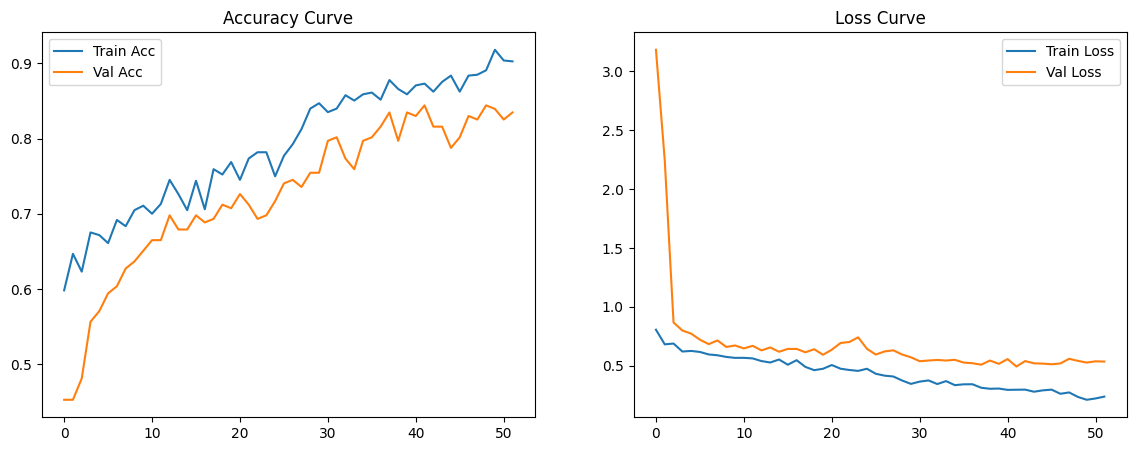

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Classification Report:
              precision    recall  f1-score   support

  Low Stress       0.85      0.80      0.82        96
 High Stress       0.84      0.88      0.86       116

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



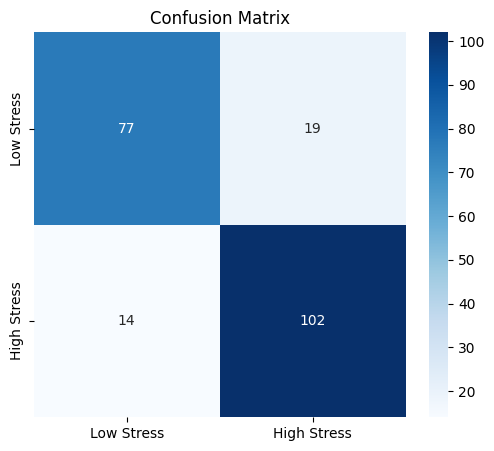

In [ ]:
stress_system.visualize_results(X_test, y_test)

In [ ]:
# Save Model to Drive
save_path = "/content/drive/My Drive/stress_cnn_model.h5"
stress_system.save(save_path)

Model saved to /content/drive/My Drive/stress_cnn_model.h5


## Real-world application example

### Student Profile

In [114]:
# Profile 1: Burnout (High Study, Low Sleep)
lifestyle_burnout = np.array([[8.5, 3.5, 0.0, 0.0, 3.9]])

# Profile 2: Healthy (Moderate Study, Good Sleep)
lifestyle_healthy = np.array([[3.0, 8.0, 3.0, 1.0, 3.7]])

loaded_model = tf.keras.models.load_model("/content/drive/My Drive/stress_cnn_model.h5")

def predict_student_status(name, lifestyle_data, audio_data):
    """
    Feeds data into SVM (Lifestyle) and CNN (Audio) and averages the result.
    """

    try:
        svm_result = svm_clf.predict(lifestyle_data)[0]
        lifestyle_risk = 1.0 if svm_result == 1 else 0.0
    except:
        lifestyle_risk = 1.0 if lifestyle_data[0][1] < 5 else 0.0

    features = extract_features(file_path)

    if features is not None:
        num_features = features.shape[0]
        # Reshape for CNN (1 sample, 40 features, 1 channel)
        features = features.reshape(1, num_features, 1)

        prediction = loaded_model.predict(features)[0][0]

    total_risk_score = (lifestyle_risk + prediction) / 2

    final_label = "HIGH STRESS" if total_risk_score > 0.5 else "LOW STRESS"

    return {
        "Student Name": name,
        "Sleep (Hrs)": lifestyle_data[0][1],
        "GPA": lifestyle_data[0][4],
        "SVM Prediction (Lifestyle)": "RISK" if lifestyle_risk > 0.5 else "OK",
        "CNN Confidence (Audio)": f"{prediction*100:.1f}%",
        "FINAL DIAGNOSIS": final_label
    }

student_a = predict_student_status("Alice (Cluster 0)", lifestyle_burnout, "/content/1.ogg")
student_b = predict_student_status("Bob (Cluster 1)", lifestyle_healthy, "/content/1.ogg")

df_results = pd.DataFrame([student_a, student_b])

def color_diagnosis(val):
    color = 'red' if val == 'HIGH STRESS' else 'green'
    weight = 'bold'
    return f'color: {color}; font-weight: {weight}'

display(df_results.style.applymap(color_diagnosis, subset=['FINAL DIAGNOSIS']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/tmp/ipython-input-773758126.py:52: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  display(df_results.style.applymap(color_diagnosis, subset=['FINAL DIAGNOSIS']))


,Student Name,Sleep (Hrs),GPA,SVM Prediction (Lifestyle),CNN Confidence (Audio),FINAL DIAGNOSIS
0,Alice (Cluster 0),3.500000,3.900000,RISK,100.0%,HIGH STRESS
1,Bob (Cluster 1),8.000000,3.700000,OK,100.0%,LOW STRESS
